# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import quadrotor
import importlib


In [2]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

In [3]:
#Part 1 (Setup)
#Making drone hover at origin (nominal controller)
horizon_length = 1000
import discretizeDynamics
part1Solver = discretizeDynamics.solver(horizon_length = horizon_length)
z0 = np.array([0., 0., 0., 0., 0, 0.])
t, state, u = quadrotor.simulate(z0, part1Solver.nominal_controller, horizon_length, disturbance = False)

print(state)
print("---")
print(u)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
---
[[2.943 2.943 2.943 ... 2.943 2.943 2.943]
 [2.943 2.943 2.943 ... 2.943 2.943 2.943]]


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAJEttZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzE5MiBjMjRlMDZjIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EwxliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpSCdb46p2sQmNXG8jiykKNs5VIHHCOA54iXCH
Grmih6C+GkN3lMa0drcJcFI3WssFydnqVg+Vl1LJ1QIQUAOowFq6Kc88vv9z7ve1Qb4UBg6torKk
1rpmNtZ/T/Xe6+Ez+EjZHG90CyaEPZ7cVZXQZiNuptG93TEmvPNuisLgNZSWC1YVoTVd7eOdKGR4
E2btWF6qv3qENxSIo0iZFN4bCV4sg09Z1np+JTLGGMjd+iSAaogkgNq3Dqg/+BV+wa5J88frVKTF
qMf9SOmf57XmoKVXAHyeLjQYiwNOAu2QDbBzy6MBARUf5V2eFXoaFOMXBP+tjfPsHcmdVXsBA/qC
gGUSyBIAAN27uWYP++KoQCJEyEkgAfJLJEIAN+UwdoCChGREevryQcouQtuG9OT0hQcT5NIIKIZi
MXGYb5pYCg0WPJpQqh8aDeD1GO2TymzpOb8uwdVLuxnBiXNdwtZywzJpuZapes2MI34Hil8Wv3Ma
dG8RBqMxkINwdqd6WKIqDjCYhxsajHH/LNDv2xXUYRMbYMubZsgtkm9EHjAfBQvGPhk3u6mlnCH6
UZrsYab3zs2frewBYt6vbb5/3rwFX9vTkt0QJqDh38Z6wAAwn6/pLsDooWZEIokzsoDnvcyoFywy
dsk2CMEZpKmSkvPSfJZRJW6S3V4fYLJGKdPSbbssfcW/HHfFnAuccafB9cxDBNMa7GUdbIJI3EZH
H10pDl6mWf1/J9eCcw1t8Y5e+tyK7L5kWB8wlNr+b+v8kIxO83x1ioMVviWKcsC2GZUxV4n3fxe/
47oCFHd5tggN0Q0hzo1Y7RBjpDdooLTFzroNUe23FUL+/BuPujhONlgJKctOH/Eo2xWrKcH7vg4A
ADrHNRHavx5AAASVvs6oEzYaAFir5DaqT6OiQFkGvq77MVdptAorpoIFAiZ88phu4EC7qX0QmQHg
3KEzSBuHN3mKuOur4vRPiK2B2Kemz/mKB+o6nCftnSGjEgx8P+zrTNhBZUxtRn5rUeVPDfVj6VSt
5DVd9/esgOUDAvUgaNWUa8XahvRkEgGdViYSRI9XMg1dGF93IbPKE30QIq8c88J0oPn+GV7R75v/
kUVAqX4phuQF695Wf+vBkRymH++TktUwr3fhrcmUEQUimelz8+BGR/jP3YkjOCXQwlXoaOrXA8JV
wJopHp3DdonjMAv486zz6SCdzoK6zQaKTh9gNIzjHzpm8AUw+XhMxCj5RekPP6P0D1lObnC28onh
nayyFUz1ta27dLsVtNh+xs1m8K7p3w3wCqSxZmDY5QP35/mtvOIa3t2Y5jenxG61Q0FG3MpPijn+
hrAE5k4FPjR014Sr3SP4i7tEiZiwu3fZq9pJjIOo25NEpDRJp7bmw5RtLKu/YefqWD79ZCJnJ3LG
U9lBtEwd3/NSYBZqcj1jBW9W8+wIPr54HkkQ1eutuV+kBzXrl/dRkMn26SRQ/svpYQ3GyO/s81xC
bpqTrPZrWZ898yb887QEcoRXod2mNidC444OrdLj5qT5DbeaBswXp8je1Vk9yhGOSCT8iND7jsAE
AEGajE28RDo1lDlrkSOnFZqt1/zoPQC4cmVo20nPmnkbvnL63z6nzGXarlQuorDphazZkNzcWgJq
Mp3S1urgxL9rYA+01fABhJ68E24QspWgibU+1XxGwxKogI8NumCUtn82gzVgAE8EUrM/HcYXRM99
LZL31g1QsdiV+LWaRnve9q8ylDkAKrSF/dEsuA2DRUGxxw4TK9BPifRhorHswMDteV+aqLJ2ORnf
udCoja6ikMjWSPG7AZpyRx1OPOZfH/9z+i5pDfiPksameWVPNJw2NKMKItsl4PGLunA4UKWUpal2
WPUIIbjYF75JckQUUvP0N

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time [s]')

In [4]:
#Part 1 (Moving in x)
#Making move in x
horizon_length = 1000
import discretizeDynamics
part1Solver = discretizeDynamics.solver(horizon_length = horizon_length)
z0 = np.array([0., 0.3, 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part1Solver.nominal_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAO9dtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzE5MiBjMjRlMDZjIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EutliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V3pz9EVxs4WbjLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpSCdb46p2sQmNXG8jiykKNs5VIHHCOA54iXCH
Grmih6C+GkN3lMa0drcJcFI3WssFydnqVg+Vl1LJ1QIQUAOowFq6Kc88vv9z7ve1Qb4UBg6torKk
1rpmNtZ/T/Xe6+Ez+EjZHG90CyaEPZ7cVZXQZiNuptG93TEmvPNuisLgNZSWC1YVoTVd7eOdKGR4
E2btWF6qv3qENxSIo0iZFN4bCV4sg09Z1np+JTLGGMjd+iSAaogkgNq3Dqg/+BV+wa5J88frVKTF
qMf9SOmf57XmoKVXAHyeLjQYiwNOAu2QDbBzy6MBARUf5V2eFXoaFOMXBP+tjfPsHcmdVXsBA/qC
gGUSyBIAAN27uWYP++KoQCJEyEkgAfJLJEIAN+UwdoCChGREevryQcouQtuG9OT0hQcT5NIIKIZi
MXGYb5pYCg0WPJpQqh8aDeD1GO2TymzpOb8uwdVLuxnBiXNdwtZywzJpuZapes2MI34Hil8Wv3Ma
dG8RBqMxkINwdqd6WKIqDjCYhxsajHH/LNDv2xXUYRMbYMubZsgtkm9EHjAfBQvGPhk3u6mlnCH6
UZrsYab3zs2frewBYt6vbb5/3rwFX9vTkt0QJqDh38Z6wAAwn6/pLsDooWZEIokzsoDnvcyoFywy
dsk2CMEZpKmSkvPSfJZRJW6S3V4fYLJGKdPSbbssfcW/HHfFnAuccafB9cxDBNMa7GUdbIJI3EZH
H10pDl6mWf1/J9eCcw1t8Y5e+tyK7L5kWB8wlNr+b+v8kIxO83x1ioMVviWKcsC2GZUxV4n3fxe/
47oCFHd5tggN0Q0hzo1Y7RBjpDdooLTFzroNUe5G7U2vbfJBo4XDaL2oGDNmNDkbpbfquD96QcAA
B1jn8jtX58gAAJK33DUCZtNACxV8lqEK+fjtojM11dNGlntZ3/cZc7NStn2bemI7Yw4reLvqHw8R
MxM8lC0eCrU8FzIeO+xz1qgq98aLcguudnqCq3H3GZzJSW5zpCpj7a30RvlF7YQW/YBKojPJh3T0
xioB7rQ9gtoHPtN33QPSJiWtBdyZrQpL0bqX+vpIHinrSg1DXDuIJ81wmOWxDNPL9lKt6JecrMQw
c2aGyL2gsrYy0LX6YiNAmyCr+N+zla+waW7Zq/ydQBVcwkk4fdVT15SVirFqQsGMOPgFoeVTVH/L
te/GxtAMbC0YqlO1nSnrCM43VlUVQEJaYWcjcHVHqti+QDMBgpppdFpTYtNlE3lE8O0QxhNPc4lW
vjZRRxJ9TVCMfBCN7VZ11+keKbJw6ASy5WQttAI1hg9leEjUqWgc3y3s8SSphiTUhXFkpAXdZdHd
I/fEW0zBy5resBksFPLW3crvPWnVlvrzwBv1N32PvHm37lbqjPFzm7CmZAErpW/my8E9Cw5//D0X
VZ0RcgtQ1+BqCAcDcVWa7MWGyBWbE4t+HaXjXR2le3UTgHI3zCG4mKegNDiR5s+W5mVFq4wEOh1I
R+f/oC15905MZt3AXX+kfjS9UbPZohZqTkWWa/J+eK1klr/uBeVk8L4ZF/0qj5GkKZUFWr26fXbw
ybhHlAM41/PZJcIgUpNxb7I9rQRmaCjYN7CuLu4Asj4m7fXM973FvezG+z3Wltmy59tw09LW1leS
QB3GzGYOKQXdj2bVI0gYtGZEQqQvywnUwcF+GiXNOouQvuf+WG9AA2PTMUMq8A9Wnkp79X9+FbDs
ramXPn3qaYXTSg3xt35WGfU/tdzJcSeyr1KckeN11zlJyUNqBIvDe6/8b83aLetBqAMPT3dAC+Pp
KS8zPu81icaMOvTYVb5hmCcesFdDJPzfEXIOcN05s3S+8B+dQpOHNH/0rkQHW8PtHlAYyJ/nqujH
IVjK3JBfIYkYMAY6e2AAA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time [s]')

In [5]:
#Part 1 (Keeping drone in vertical postion)
#Making drone hover at origin in a vertical positon(pi/2)
horizon_length = 1000
import discretizeDynamics
part1Solver = discretizeDynamics.solver(horizon_length = horizon_length)
z0 = np.array([0., 0., 0., 0., np.pi/2, 0.])
t, state, u = quadrotor.simulate(z0, part1Solver.nominal_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAALA1tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzE5MiBjMjRlMDZjIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EkBliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAAADAAADAAB1oWGAKYNX0WHAAAAD
AAmgAVAAowCUgKmhHu/ifulxAQcwg58Gg9IQ//ND6pvzvVm0S1gLeifirHZOZuMa+DWBSERwDJuK
Rls1wwiJr4cof7z2cZAmI629h/13RClUxSw2nWg78hfTSbAu/R33AELAxpF7tz+7C/Wc42llJd7/
jv5/5eyIvbVaeliyk24erZdh5JiZfSMmPlin8lZoaDeZVoIFfNLV0B+RvVg9N/oaI3qY3rh/eida
Al3Gi14ub56yDcIAk2CCtI4ygVRpEaiQyJpGS8sDimLBPq8YKec1+MfgMDjRhPBSoas+Aj8CjcvV
M2MKYUr9QTodafJePeP1etcGE2uUr2Y9LJYU1a6c5h9D/BrJuuk+dyypTVqWVFSMibVjKAC9MW6l
ECIMouTPcIcyHY5QCVik4VHbOSY5AjTyk1HCtCRAY15fjHMHfj9FucwFQAEEAAAEaVoMnzvoz8Ze
2jxHsdyww/lwIPhYZj9cr/sCzDGA1JXOpktMzUsr2rKk2ZDKOAW5ayX7+OPXXeNVyPAf6cl+QoDD
6XmjYBLS5p2thcV6nvSE56tcwW0qgnT7Bkr/3EgFlC2Gmcq9VVEMzSTnjDNi13TNYmkTjaMClYZr
pYzoHejY2u3pMNP/q6PSJQbiA8VzfdY30q2gf0DHsVXRKw3GSam1DkB3jZwwE6vysr57I39hBcdp
xEnQi97R/1J34x6EpF5vGwb3Z0WP9ng1nzHcZNPdPl5nmhYqn3Emb9/tHaf1TUlft4MWLhnZchpo
8kk7V1rA89/axfRKDwC7UViR+Hd/DN0iXmPdPs+yhRzorcEtANHXTyOiKu+AKBG5ykWbCJ85PQoH
+x3IRc3iyLcLia0HLJ1k11k+F5HKec7CFUekAAADAAADAAADAAA0fdssoBX3TUWcPai5p4M6ULjV
CsreA+QcMDpOSHv8PDGxhqRuLpSCdb49V2sQmNXG8jiykKPdOn141v1QAj+SaH0NqOWYp0SBap1H
c/Nc4WwKR2EPN/5+EpTVOWS0JehbdtpAA8SnkQOC3gMXo/5qsmPYvPCG6m4IzgkJyF+PAqzsJKKB
/86yjQIX1XgAR8EViZwhPY0m8f/MzA8G5gGq29s14cI2XhcBrKSkNF/Ur2hFN/HOlDI8CbN2hdeH
YbhG4R0JwvZMim8NhK8WQZ+o0ekvdkNT4cC+0xJANUQSQG0slW9v/ErD/7Mk+a3Qq4P3yjH/Ujpn
+e15rilTeB8nccEZCgJQvvbIBthvbIzGAGPP8qbVd+Vg6T2bOKlnY3z7B3JnVpHu/P0gEAAAAwAA
AwAAAwAAzbbHPTX2RrklWReD6nRTnif/zzwkEFEMxGLjMN+NMBQaLHk0oVP8VulD1Gf8JxmzpOb8
uwxvRZqDyhGnc13C1nNQ+I6vRTYxPM04i1/WzeWmqwkFGWECrXBtENewr244icOGmIcbGoE45Fuc
8rjwHyYwiY2wVNroBBbJN6EmMWwHwVtS3XLyx3W6Eodm6415H3mcm0904FyF52ote7W6wMlodCIg
99x4zvpavEEo7IghwzrhOVQNGMkaTE0/TDZyx7LHwJ9lP3hxnIhlX7gMnYyqu32iAlPjfvTM0/PJ
OCjHXJHkniK+/dw6HxlY2wkNlm+dlAc99j/Wtc2QNXCKcXvXSGY9GiPY8DEYAX+AEK61FELarH5t
MLik0gFb1z80Umz/JMQ0yMpMaJlcMtd3K7/ozOpVhmVMVeJ938Xv+O6AhC+ZwSttRhOkl5SOONL1
D4ypoS+hjP/6PNmmB1FlyBCOdkj7S3ELK57vSPvfvAAAAwAAAwA5xgAZszXwF+K1vTtd6wwcVZZE
P5oKUQavAM9qd+1zAxQcguf7qdaKy720ChN2DLnCKS94zwW7d6PQlHGl183CLs/Qn3vc+N+6SG14
vW+038oYnj3xKKXOEAKJR0kFTbTblVxWtLB57l72IXC94W3URKB8V4EH8kEO/wu/2EiMyp2mr47f
TL3U5ykiOlJy8BQ3VWLe6S5eH2zC6ABXKhlYq4zPclqmFe79LPF40Rozsx9Ln58CA99clEAdpvog
glDiMCwyVTXSjhXUm/BV+4KVtmqUvpzq5b8u1NLT1nSocZLHPcZpBAiDewWqZVs4xcM0FjADMBgp
ppc1DdzB4Q98aDaRR+wxFgKjfojmfhE8F45qGQoeByyBntowGME/z2UEOL9qJvZLXjUOYIPpjr0N
Q37YWxqej4ncwM+UwwTFhV/7PEWso4Y5Q8Whky+Nhm64Sx2wSwLEHQwUuWufGJFOuvM9pEdYAQ+N
zqcfy2edQ4dPmRpU4yGBtz+YABVC1eoC20Wa8Q6QIYAjYmFO4NR6SoqsLzMsdXXoZOVFy8ziNvdf
+ar5GLzSYHOKwBJxhbLrVZNvtHjZgQMRWLFwTKRZAWkLquJ4asXqZ3YOe9P3gqcEp9rNnoXv0/hq
L+20rz8OXq1ZwpSGumRZv/MHA41cTE2le8yU9En0tFR9DbET84kNxUz85YQrfjDsgoEQg+FOLjNE
1wAAAwCL89vjKk4axcL0WWvAtXAjkzMmAS5wblB4kPrWO2xObri8sqUQU8ItoVbwuLyNHDOBN3fH
DJIQAAafs86zHJvgLCJAA2Ev5g0ByLbI6moNi6MNa00ntZvaFbiOsQw0oeWlBbPLVU+9MvgXTbwY
d7S01k+oXm8uzgvZssJG7v4zRflqqncIrKfyjP/VcrsWZ/3C9lGoSA1fcsW3vgWt1OUigp+hrg2l
H3RMw10VcbV7LHyj1cjXS/0IWJX0W84Tzgq/CwLx6g47E2aFsA2+2+vKXKfcK+FRhE8sVfv5haQg
TywI4AEjRH+PR7JJ2IABb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time [s]')

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

In [6]:
#Part 2 (LQR to stay in place)
#Making drone stay at orgin even during disturbances
horizon_length = 1000
import LQR
part2Solver = LQR.solver2(horizon_length = horizon_length)
z0 = np.array([0., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part2Solver.stay_still_controller, horizon_length, disturbance = True)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

[[1.e+200 0.e+000 0.e+000 0.e+000 0.e+000 0.e+000]
 [0.e+000 1.e+200 0.e+000 0.e+000 0.e+000 0.e+000]
 [0.e+000 0.e+000 1.e+200 0.e+000 0.e+000 0.e+000]
 [0.e+000 0.e+000 0.e+000 1.e+200 0.e+000 0.e+000]
 [0.e+000 0.e+000 0.e+000 0.e+000 1.e+200 0.e+000]
 [0.e+000 0.e+000 0.e+000 0.e+000 0.e+000 1.e+200]]
[[1.e-05 0.e+00]
 [0.e+00 1.e-05]]


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAYORtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzE5MiBjMjRlMDZjIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EjxliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhmedEfUwaAQY0NNeI9N/r8O7WKv1d/gCdaAl
3Gi81o3z2y10tRWcIK0jjKBVUuThZ+QsHL0juuKYsYerxwqtDlxCDeItdrlLIe68DWXvwKOyDYHE
ScRYU8BCVbYG+CUL9LfBvAFLdMKsx8aFL0gHYcZ1oT+thVmulCoT81aUdXAvNWxJVeFoyHDIqUgd
hcLMjnuFJjpeTkAmyryQvcvS4V4TvwAH5GvqxR/klTJ4m9/HcwC9/Ge6Jm0WCwAF+A+AFukIiPR5
HcOlFrk8R7HcsMP5cCD00OzFbxxx7aX8VHTYhVMlpmalle1ZDl/cE/wC3LWS/fxx66VCxWF0mN7q
DSXQGPpeaNgEtLmna2FcGi8IOTnq1zBbSlcCafl9/aFdeYjka9zSsNpT2FkjcXMM2LXdM1iaRIN/
VIrOeibMPA70bG1y+Yiu59975Bcd6CIZ8zrde1PsoH9Ax7FV0SsM+DJoqQZ/xX42q837Jjz+eyN/
YQXHabzJjgDbSH+fO/GPQkYwt4eLvCvix/s8Gs+Y7jJp7n8qNI0SGJrOdTnfxR2n9U1JX7eDFi4P
2dkCtO2o++3jIvPf2sX0Sg8Au1FYQ3h3f2hq8aJj257PsoUc6K3BLJqRv48jfClvmGixocpFmwif
OT0J9/s9yEXN4siv16AhKiYEP1V7b9ezHKeab2T1cuAAAAMAAAMAAAMAAPseU6pDxjoTbt42gEdP
BnShcaoVlbwHyDhgdJyQ9/h4Y2MNR9xdKQTrfHiu1iExq43kcWUhR6J0+vGt+qAEfyTQ+hsRyzFO
iQLVOo7n5rnCWBSOq2y31ymXcEHbZLQl6Ftg2kADxKeRA4LeAxef/nLiY9i88IXtXgShCpojfbqi
wg8+voH/zrKNAhfVem4Ja4yKnCHciybx/8zMDwbmAaraFkXgV3oEQoEHbLIaMsFITPoS+OdKGR4E
2btC68O03QwG35U0+RMim8NhK8WQZ+pEekrXkNTzM+7ExJANUQSQG0slW9v/IrEAaSE+aHQq4l3i
jH/Ujpn+e15rilRIB8nciDZCgJQvvbIBthvbQzGAGPP8qbKF+A5ZOJavGbCkxmVMh6aDkCGeAawA
AAMAAAMAAAMAAAMAZBtjnpnYkmHKLkLbhvTk9IUHxj4SCCiGYjFxmG/GWAoNFjyaUKn+K5Sh6jP+
E4TZ0nN+XYOql3+MyhF71tPR7XZPofRlWC961c/QNpfHg0Nvzxp5hfhyxVroriVBJ6bBQL6LLKXM
jJyinFuU8rjwHyYwiY2wVNroBBbJN6EacWwHwVtS/Wryx3W6Eodm6415H3mcm0904FxwLhpyEKA6
wQcVNVAr4dxtycSK3OBm4Xa3UxXCcqgaMZI0mJpemFzlj2WPgT7KfvDjONDKv3AZOxlVdupCBKfG
/emZp+eScFGOuSPJPEV9+7htPjKyug/bLN87KA577H+ta5sgauEU4vitkMx6NEex4GIwAv8AIV1q
KIW1WPz4bm+thJGgAwqXDB2f5JiGmRlJjRMrfHb8rzv+h22E4dxlEMEJBAY9H820CEL5nBK21GE6
SXk+Xzt6FD2b+1D6eFIIJhFwBMyhu9+Msu24BbkOms3kJITpCrLdFy/Ib8XsAAADAAADAAAJnyoG
6rg5rgKdCL4MZc7NStnG1LhHAxdZX4P0tzSCsw46JjkJaFH8b1E2967/MR/ci/baKid9qBr7morc
f9x1Vv7lVLNZx3/I/nHyKj63CUyMwHNYaxVcmAab0PGg0JudTitBOPApwVEu5ONIoK97F+U/wRFE
rd5dwt6Ltoe9fHiAOZLpAmOo5+xVGAMIO1IKdfX8u6Cmp20dilb0elrG4E2qvt7Cf3Z+uqTxYa/S
5mBqmP8R1+wX5dgW4FfrsUj07ieNbVEhEZwxSSf7rEIsVDhnC3RM7v0UDI0X09bALkfK+YKZm2YK
mKQ8/o/QPWU5ubmoc1sNAllKvD9R4IfPWyeAonUAlmC/k8cgW0HsubEf3/Wq1YU0g0BaErWHhPtk
uOlpK+BsT6qsLjqGX29mNpZH26x9U7O9hZF/DZa0We1uyYo86egAV0MyYJJrarrA1G454Iq+BTCi
y6qV5TF0C7Tg8d+SGkKIWo+l8BmpkE1TnLjA01+vbjnLnIotq9bQTq9luyRwJO3Drr38MYZ9Nowh
xpQmFgS5NnygDmDdmN8NB8wcGp6XAlsjJ8yoD3fwHXPUh52iRISNe/2QXtSFAx79H7esnV7PukvZ
etfPOfeS9LsLuw9SMbnkAZkk2HyrgSlshEi7Ifr36qDMy9/KYMbrpQLwdRwrba5M02z17s6LQCwx
FWY5lIF9cKP934PxFqUjoBmgTdJ0/t8+wV5EDvy33ZOJrpOjttUE8tdwVbqslHA4+xyM75Vs7ZCp
dRSGRrJHjdgOScrm6VCzsn0P+0zhirArWC1Qk9iZebbwX1CjwjO2tOM70We9L6RDjWxrBRjUGbEV
wznDiC0K9g1OTvxKrUjDds27tygTpmQkhFf5qTSx/ubAAADDX3HcvmVb7+9GNcAAAAMAABz2fdKU
lsLpcr5eC8DrtHk850bY4s3swpoY+aI9uAzKOAUn4Vi+IGsfrGmvGzS9FC1nua35409AX8/beYi2
KJfzzlQQDv+uvz+hXa3wV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time [s]')

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=0$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Is it possible to do the same thing while keeping a desired orientation of $\theta = \frac{\pi}{4}$ ? What might influence the results in this case?

In [7]:
import trajectoryGeneration
importlib.reload(trajectoryGeneration)
#Part 3 (LQR trajectory to move in a circle)
#Making drone move in a circle without disturbances
horizon_length = 1000
part3Solver = trajectoryGeneration.solver3(horizon_length = horizon_length)
z0 = np.array([1., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part3Solver.move_circular_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAZlBtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzE5MiBjMjRlMDZjIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
E4FliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhmedEfUwaAQY0NNeI9N/r8O7WKv1d/gCdaAl
3Gi81o3z2y10tRWcIK0jjKBVUuThZ+QsHL0juuKYsYerxwt5gPJY/10Ju9cBgsZD+IYpXX8y4aU4
GzaP2PrB4NuOhJtn+9mFNWxeFMP7FK4BWsfJQXfJEjhPgMMovYZQhGmpmRnItDNjjPOpOswlA7i1
FScQFRrejmrIi8OOhTAscBGZQxLIoVdyVxGaX0C0gyTiqrr63K+uEhJ+qks1tv3wSCRyHbkjhaDH
UAaOg0i6B/Gp7ihd1EJvSGLAP1z4GLBCDMdHDw4PU7GyRgXHegTUzETVOhdzMU/O7baIvYfpFkAA
AAMAEEH8N1eQAAxiuJdDCAAnhNi3KcGPQLiPR5GJtG5EVhbJEuC2fw22L0tcmQHOqE2DkFOb5DkM
oECkLUsr2rFzIFjP8Aty1kv38cfUQb4VhdJje6g0lvFVwDzupV8YyadrYTbQ0V6QnPVrmC2k3ZHc
EGSv/cSAV3S2OiUTsbXt4aSXA9OBbYtd0zWJpEgRZGpWGa6WM6B3o2LsJv5A7do8AtLa06LitP8X
gGtXRGUrDaaaQDvv91yTyCfArTjP1P7Ce2gzyqDKUzjQewlj9A98NDsj+21H/qttgfTYFcjN+lQB
TkER9NDBRH5mpR5B3Z4zoq8XAD83ZxAgAcGz7+XFyOyCRT8pPoofdK1jt7ZNWi3WLIz//fstZfzD
9EwMG6IgWgxOgraEB87GbRvoU9trnlapPv//19SRgnw7MPlGliDKG5CFYB3Rs/vm3V8MiYdhHUSb
CR3wmpYdzFsup++H5k9CddpO38+PnFFEU8x57F/2FpVcDaPcncAnUIvhDu42mEh4ABDtttf2gEbB
Zto14KDAAAE16AOHoA5+zNvNz3pzU3Zy26c13NPBnShcaoVlbq+GE0cl4MI9f4eGNjaWq0rFJBOt
8D3HIIKXVxvI4spEbJjwpA44RwHPES4Q40ufz2CL4aQ3eUxrR2twCH10HoZE2C4SlNU5ZLQl53ne
jSAB4lPIgcFvAYqZ+z6qWztGBGYFrXsNAaDtoU/cFUswefX0D/51lGiBOMxZaS8/ARoQ6ds4qyug
zEbdTaRA04iyL1ipQNfQIO19CEMuzlv1Qp+OdKGR4E2btdRTpQAIobiOWlMlfMN4bCV4sgVxEPr9
n+Qxq7JJ6zKXm+Kyy+4n6xFpwrrCc/dDX2ViQQJAe0YMAbA+zJabcfpf83YeYCHKADp9jLRN+KYn
VdrpH/XDIL526vBY9aTRlCrr2xmPIUnjPwYPMzRjXMgq89hk4WlqIJHwS4FuQBBSpAFNV5u0PP2k
r2/wisGqulgAWs656EjJJaSwcIAAF4U36ZjuM8kO6Ta2E3bVwAABtzwEuQAPrtec5X9OtFMlYdyR
/3INRiAO8j4buDSiCAdRJNaszVGewTvdamhiZxlTBEFXMx0nnfsil6aHdFD+yjnlUFj/c+zeeVvD
tjYxFjOwPmp9ciNTiWNeq1pMIvOj05cWn37DDvSxifj33DolGTaplRC+O/bFdRhExtggPn2aC2Op
BDpp5IPgrbYctZ96d1uhKHZuuI/iB3VCLF91zyin2nIQoChm+dCN+iD33g2VXQFKtPx2RBDhoTmK
LgaLv40mKMb4z9YY9lj4E+yn7vyhZie9utGtqIBxhrUa8w5gujyE/8hTKxzVlZ3qKcTEHJ+YsQWk
6r4qui/P3mXJuMNa6FOsd5KZWNU11ng0cgTvy+chNrLJNRq1SlPDng8aMzT9yQu+8XbwK86cYDKF
SRojy6PpAtau6FpOG/G5FQ9WPo9+xfQfqGJCrWjWnpGYChs2lXrWheB+YMMqSCUjUl902BObycH/
j2ENz2arfMCdN+bvjgE6YQ8PtO+MWIJ1I+4QAzIqqAsllIbfh7C8M4cscQZMS8rqVmaOQE16i/Px
O4RpYYvEUEHJtAlwb5pbcs1BEbauQTsmNi2AAABugLvmpDQBwdfq5drhDAqLlYDgDXdLe/G5wsPX
r/n9LfSm8HExVQf2Gvsi6/7COF1BMN3NbiWLNUlKgOUcr9AcFzmb+w/q327/o+l8kNNPT2SHf04I
ekIxWS4S9Ezx+3xtx3vhuCpu6j7Q2Ni2pHL0ToXPtQ4+Yp8kCOnOTs8tDi8+Uff+5h1oZMOQqPH0
rfxoqszYGRS3XIjuKJO9CGEq7gfP98HFi1IWDGHHw2UsE8trGVU8VjlXNMeMVSnazpUCm1vXTq9b
gVxNH24hcOxW9eqSxgBmAwU00uWtRPrIhEA+rPYLoFgtOeP26gEvP/ELnjMPq/bA/+Y2VGLcdbS2
ihAFjq970W4jI59stN5vr8OxfP/pMNes/ovKjwvtuSnrZn5dxVmDSaIM3+8rFN8R5UypMpfGnzV4
sfGxKsmh3DdHg2LF1LjAMx7gBNEkGGJpeZsEDvKtkI/oqhKUff9LJ5bGYQM5QLKq8bEv8S8Fbsa+
B3wiYwgORGJ3EOeKap/D9TemvXYti2Jqa8zO6sZ9xPtZKduwzuz3lTORWvWw7s+WeWkehkuSDjh+
A5nkmUx/gB04RZd5u3Sw2PIVSGftBBRcZSbkZ8xXLXtVNhLmWA9ldiFIo1hAe5gzHwn/sp423VK2
aCw7y+32Z6uzWScxSzAAb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time [s]')

In [8]:
#Part 3 (LQR trajectory to move in a circle)
#Making drone move in a circle during disturbances also
horizon_length = 1000
import trajectoryGeneration
part3Solver = trajectoryGeneration.solver3(horizon_length = horizon_length)
z0 = np.array([1., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part3Solver.move_circular_controller, horizon_length, disturbance = True)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAdKBtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzE5MiBjMjRlMDZjIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyNCAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
E4hliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhmedEfUwaAQY0NNeI9N/r8O7WKv1d/gCdaAl
3Gi81o3z2y10tRWcIK0jjKBVUuThZ+QsHL0juuKYsYerxwt5gPJY/10Ju9cBgsZD+IYpXX8y4aU4
GzaP2PrB4NuOhJtn+9mFNWxeFMP7FK4BWsfJQXfJEjhPgMMovYZQhGmpmRnItDNjjPOpOswlA7i1
FScQFRrejmrIi8OOhTAscBGZQxLIoVdyVxGaX0C0gyTiqrr63K+uEhJ+qks1tv3wSCRyHbkjhaDH
UAaOg0i6B/Gp7ihd1EJvSGLAP1z4GLBCDMdHDw4PU7GyRgXHegTUzETVOhdzMU/O7baIvYfpFkAA
AAMAEEH8N1eQAAxiuJdDCAAnhNi3KcGPQLiPR5GJtG5EVhbJEuC2fw22L0tcmQHOqE2DkFOb5DkM
oECkLUsr2rFzIFjP8Aty1kv38cfUQb4VhdJje6g0lvFVwDzupV8YyadrYTbQ0V6QnPVrmC2k3ZHc
EGSv/cSAV3S2OiUTsbXt4aSXA9OBbYtd0zWJpEgRZGpWGa6WM6B3o2LsJv5A7do8AtLa06LitP8X
gGtXRGUrDaaaQDvv91yTyCfArTjP1P7Ce2gzyqDKUzjQewlj9A98NDsj+21H/qttgfTYFcjN+lQB
TkER9NDBRH5mpR5B3Z4zoq8XAD83ZxAgAcGz7+XFyOyCRT8pPoofdK1jt7ZNWi3WLIz//fstZfzD
9EwMG6IgWgxOgraEB87GbRvoU9trnlapPv//19SRgnw7MPlGliDKG5CFYB3Rs/vm3V8MiYdhHUSb
CR3wmpYdzFsup++H5k9CddpO38+PnFFEU8x57F/2FpVcDaPcncAnUIvhDu42mEh4ABDtttf2gEbB
Zto14KDAAAE16AOHoA5+zNvNz3pzU3Zy26c13NPBnShcaoVlbq+GE0cl4MI9f4eGNjaWq0rFJBOt
8D3HIIKXVxvI4spEbJjwpA44RwHPES4Q40ufz2CL4aQ3eUxrR2twCH10HoZE2C4SlNU5ZLQl53ne
jSAB4lPIgcFvAYqZ+z6qWztGBGYFrXsNAaDtoU/cFUswefX0D/51lGiBOMxZaS8/ARoQ6ds4qyug
zEbdTaRA04iyL1ipQNfQIO19CEMuzlv1Qp+OdKGR4E2btdRTpQAIobiOWlMlfMN4bCV4sgVxEPr9
n+Qxq7JJ6zKXm+Kyy+4n6xFpwrrCc/dDX2ViQQJAe0YMAbA+zJabcfpf83YeYCHKADp9jLRN+KYn
VdrpH/XDIL526vBY9aTRlCrr2xmPIUnjPwYPMzRjXMgq89hk4WlqIJHwS4FuQBBSpAFNV5u0PP2k
r2/wisGqulgAWs656EjJJaSwcIAAF4U36ZjuM8kO6Ta2E3bVwAABtzwEuQAPrtec5X9OtFMlYdyR
/3INRiAO8j4buDSiCAdRJNaszVGewTvdamhiZxlTBEFXMx0nnfsil6aHdFD+yjnlUFj/c+zeeVvD
tjYxFjOwPmp9ciNTiWNeq1pMIvOj05cWn37DDvSxifj33DolGTaplRC+O/bFdRhExtggPn2aC2Op
BDpp5IPgrbYctZ96d1uhKHZuuI/iB3VCLF91zyin2nIQoChm+dCN+iD33g2VXQFKtPx2RBDhoTmK
LgaLv40mKMb4z9YY9lj4E+yn7vyhZie9utGtqIBxhrUa8w5gujyE/8hTKxzVlZ3qKcTEHJ+YsQWk
6r4qui/P3mXJuMNa6FOsd5KZWNU11ng0cgTvy+chNrLJNRq1SlPDng8aMzT9yQu+8XbwK86cYDKF
SRojy6PpAtau6FpOG/G5FQ9WPo9+xfQfqGJCrWjWnpGYChs2lXrWheB+YMMqSCUjUl902BObycH/
j2ENz2arfMCdN+bvjgE6YQ8PtO+MWIJ1I+4QAzIqqAsllIbfh7C8M4cscQZMS8rqVmaOQE16i/Px
O4RpYYvEUEHJtAlwb5pbcs1BEbauQTsmNi2AAABugLvmpDQBwdfq5drhDAqLlYDgDXdLe/G5wsPX
r/n9LfSm8HExVQf2Gvsi6/7COF1BMN3NbiWLNUlKgOUcr9AcFzmb+w/q327/o+l8kNNPT2SHf04I
ekIxWS4S9Ezx+3xtx3vhuCpu6j7Q2Ni2pHL0ToXPtQ4+Yp8kCOnOTs8tDi8+Uff+5h1oZMOQqPH0
rfxoqszYGRS3XIjuKJO9CGEq7gfP98HFi1IWDGHHw2UsE8trGVU8VjlXNMeMVSnazpUCm1vXTq9b
gVxNH24hcOxW9eqSxgBmAwU00uWtRPrIhEA+rPYLoFgtOeP26gEvP/ELnjMPq/bA/+Y2VGLcdbS2
ihAFjq970W4jI59stN5vr8OxfP/pMNes/ovKjwvtuSnrZn5dxVmDSaIM3+8rFN8R5UypMpfGnzV4
sfGxKsmh3DdHg2LF1LjAMx7gBNEkGGJpeZsEDvKtkI/oqhKUff9LJ5bGYQM5QLKq8bEv8S8Fbsa+
B3wiYwgORGJ3EOeKap/D9TemvXYti2Jqa8zO6sZ9xPtZKduwzuz3lTORWvWw7s+WeWkehkuSDjh+
A5nkmUx/gB04RZd5u3Sw2PIVSGftBBRcZSbkZ8xVvDemiAS5lgPYOxdiVoPB348smFzG0gUVHbJP
WvYF7GmbAs+y2vQkMDwAI

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Time [s]')

In [9]:
#Part 3 (LQR trajectory to move in a circle at pi/4)
#Making drone move in a circle at pi/4
horizon_length = 1000
import trajectoryGeneration
part3Solver = trajectoryGeneration.solver3(horizon_length = horizon_length)
z0 = np.array([1., 0., 0., 0., np.pi / 4, 0.])
t, state, u = quadrotor.simulate(z0, part3Solver.move_circular_tilted_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

TypeError: solver3.solve_LQR_trajectory() missing 1 required positional argument: 'iState'

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAfa9tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EpNliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLinTkrRqis8WtrPmCEZAG09t
BnlUGDyrF7431X9Ggsrr4v6OxH3Opz8Upv6jIHjIzP5WqIZIDUCZJTtQl68zbgvt7J2ra/bwZpM6
paowcJtM5ZPE24z39rF9EoPALouyjTBUL7cdrRruf2amRzdb5SfnlyLpNJsUyMUXdvUxZRHKRZsI
nzk9CHf6mmhFzeMa8GeYkaWJcEqg2wO48jlPNGeCIpIkj77FEgAAAwAAAwAAAwAACnRUDZr9qtYv
E/CgEdPBnShcaoVlbvjrHnAdJyQ9/h4Y2MNJLgTeH/2ubsafAQmv/f4fxiuVoM5NHnHCOA54iXCH
kF23qB2RT/9mtKLPwDyxErginenOpAma7GsG6y6lk6cEIKAHUYC1dFOeeYX/OjO/h73WT8xDvoQi
bOpMhvbWf0/13uvhOPhy2RxvdAsmhD2hkt4/+ZmB4NzAOA0YZrzxLorC4DWUlgtWFaQAqClxr6lD
I8CbN2rG9WaoD6f344CRn5XzDeGwleLIOUnMlBF+0ccP9RkqY6i/aA5Vgbrmew/+kHLtlOHE842O
q1qkfNnUjpn+e18lCdEr9QypkDsxYGnAXbIBtDw5dGAgIqP8n7PCr0NCzlqmsbnY3z7B3JnDo6kq
ei3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIt7rH1nPHKLkLbhvTk9IT6FH4SCC
iGYjFxmHR6WAoNFjyaUKodxvESbn3hE4TZ0nN+XYOql3Yz4xLmu4Ws5YZk03VtUeWZ9sFOl8eD1b
ZTEn5rZHecMNohlkivHAATWdTw3DolGULj/hmh37YrqMImNsGUtimQWyTeiDxgPgrbnRVNJvd1NL
OEP0jZkGeZybTRyjC31/9gvHJm0M8eTsemVvPT1bdz5bN3wDJfIB8r9lJEe1zyGpFqNfmCIewsp6
9lJc5hd2k7NZoyZMUncBomQaPr92h1zHadqjwVF197bssfcgxvLfFnAuccafB9tGiDrGNDBcK7yt
A3EZHH10pDl6mNvx/dtP2p4cK9AVb/Kh6nL5kWB8wetr+b+v8kIxYZ6x1ioMVviWKcsCgGZUxV4n
3fxe/47oCEV5nBK21GE6SXo1Y7RBjpDdooLTFzroNUe23FUb++JSTSqzR+bDqjvhmUlh0Ny1WLvl
CQykQABVLz1Zs78zgAAFJr6qe1o2RYzQGn5DoyTK93kOE4G1HcVI3hkEQd64Iy5i/Fji+BMAWW+1
9oHydXxPXK10gl7V8jm+8Dha8wb8ja02Oe3ucAqGI6eoEcnJycI67M6CRF9Z7vpTN+x/zirwXf8b
hfkEienkKSvIw9V98+PKWbA+FWFkk5w6bOE6sxIKu/yn/1//jMfvS+5bP9Q1toW/uYcWlQM8vxLU
0negLMIIuAi5md51kaeCD/m1l3DoBt+aJDGR6WeLEv/ikj1ie/yeWauHyYiY6/JV1IUBByNB+1Kw
rqPj4oTMAv4+Vcv2e7gOSVsLRiqU7WdKer/3YRqUwYgRtph1MP0XG2WkQWsc/PhNNLoDzOOcG75v
YXVcLOos6qGTcjKvvHLcNQPxuHseuWVVuyFHq9ZzwIzOdhY+pgxk0QnzvWZG1uCV8qrovZbBWJ7a
m60GM/nU7Fr2NLzbuFdfSTqxMUQ5tp91h6ckbYCyav9/YR58kF7/cFHvr9k35Xi2MRtgYan+6XnT
3/tiJTqmvjGiL5NEtVhfA5RcuNPkCaznqDqIKGlBA1RfPVmdO0/MxrMU74O3mo7QZipPihvF/kwH
X9z2iUVnqd24rqGEOoVuzrS8F00q9ej7nfgq1TQvgYu7JHFG6GiEv++yXG9VQow05+721G17NwJw
Jc/bSCEx5NlsNh8Oa0RuFYn6K/MS4pQAiNf4pNkICk3/fsv9U3slMk02uqOEpqOCDtcu3RyiEJEr
2jVbX+hmDZ/9xLxi3B0gAI/dAmfjYC/dQJVrZWSMg86+Ew0TyhHH85Q4Xlph4jbvyq9qgPGzI6bJ
tGSGMj9X17L1n7xr2B1zo+11/6Gdy/n9o15Ui/MWbGohlLmfb3WB32EgJlzjs2IJwy3XgdvInkoL
TuIEejZbRIDiaX5GODnO6Os/6kesY1ZdNrEBr5sU2gxD0qGfmnxqibAXuKnYxNbgAaoBsfUk99Rv
P+oZONQAAAMAAAMDJL5XK

<IPython.core.display.Javascript object>


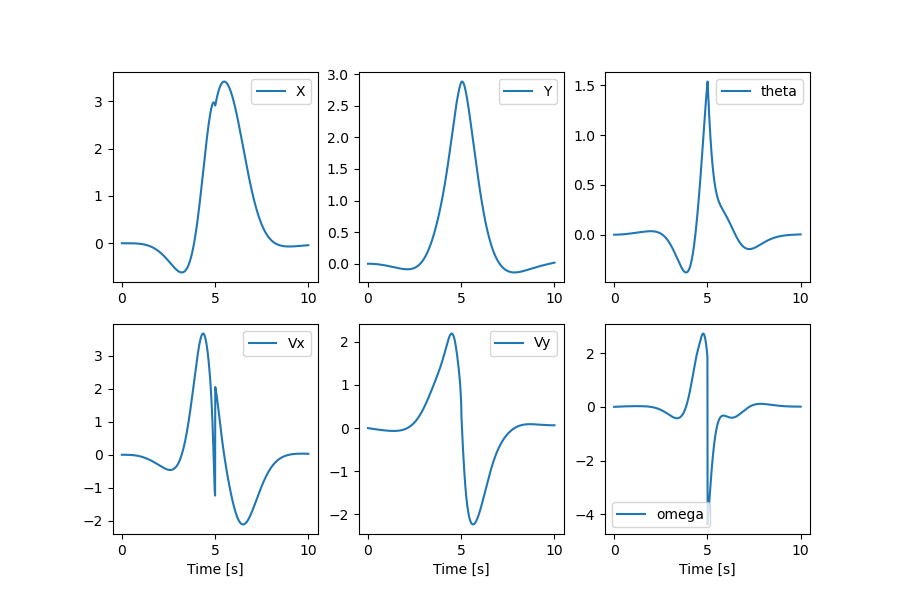

<IPython.core.display.Javascript object>


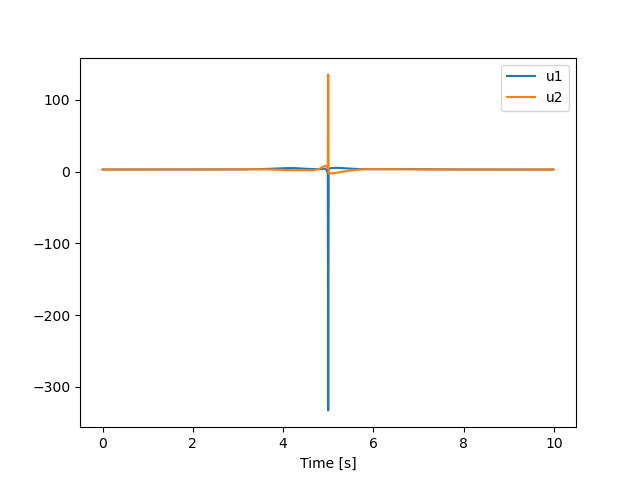

Text(0.5, 0, 'Time [s]')

In [ ]:
#Part 4.1 (iLQR vertical orientation)
#Making drone reach vertical orientation come back to origin
horizon_length = 1000
import iLQR
part4Solver1 = iLQR.solver4(horizon_length = horizon_length)
z0 = np.array([0., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part4Solver1.vertical_orientation_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAdXxtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EsVliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLinTkrRqis8WtrPmCEZAG09t
BnlUGDyrF7431X9Ggsrr4v6OxH3Opz8Upv6jIHjIzP5WqIZIDUCZJTtQl68zbgvt7J2ra/bwZpM6
paowcJtM5ZPE24z39rF9EoPALouyjTBUL7cdrRruf2amRzdb5SfnlyLpNJsUyMUXdvUxZRHKRZsI
nzk9CHf6mmhFzeMa8GeYkaWJcEqg2wO48jlPNGeCIpIkj77FEgAAAwAAAwAAAwAACnRUDZr9qtYv
E/CgEdPBnShcaoVlbvjrHnAdJyQ9/h4Y2MNJLgTeH/2ubsafAQmv/f4fxiuVoM5NHnHCOA54iXCH
kF23qB2RT/9mtKLPwDyxErginenOpAma7GsG6y6lk6cEIKAHUYC1dFOeeYX/OjO/h73WT8xDvoQi
bOpMhvbWf0/13uvhOPhy2RxvdAsmhD2hkt4/+ZmB4NzAOA0YZrzxLorC4DWUlgtWFaQAqClxr6lD
I8CbN2rG9WaoD6f344CRn5XzDeGwleLIOUnMlBF+0ccP9RkqY6i/aA5Vgbrmew/+kHLtlOHE842O
q1qkfNnUjpn+e18lCdEr9QypkDsxYGnAXbIBtDw5dGAgIqP8n7PCr0NCzlqmsbnY3z7B3JnDo6kq
ei3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIt7rH1nPHKLkLbhvTk9IT6FH4SCC
iGYjFxmHR6WAoNFjyaUKodxvESbn3hE4TZ0nN+XYOql3Yz4xLmu4Ws5YZk03VtUeWZ9sFOl8eD1b
ZTEn5rZHecMNohlkivHAATWdTw3DolGULj/hmh37YrqMImNsGUtimQWyTeiDxgPgrbnRVNJvd1NL
OEP0jZkGeZybTRyjC31/9gvHJm0M8eTsemVvPT1bdz5bN3wDJfIB8r9lJEe1zyGpFqNfmCIewsp6
9lJc5hd2k7NZoyZMUncBomQaPr92h1zHadqjwVF197bssfcgxvLfFnAuccafB9tGiDrGNDBcK7yt
A3EZHH10pDl6mNvx/dtP2p4cK9AVb/Kh6nL5kWB8wetr+b+v8kIxYZ6x1ioMVviWKcsCgGZUxV4n
3fxe/47oCEV5nBK21GE6SXo1Y7RBjpDdooLTFzroNUe23FUb++JSTSqzR+bDqjvhmUlh0Ny1WLvl
CQykQABVLz1Zs78zgAAFJr6qe1o2RABcq+QQ1k+tZkPk76bNrYl3JXXK0LeDz0+tBSSCq/n7TF5R
CcQVRwB3kUodXWB9ha9GCcYJVaGWcCRP0oCf8kQUnOCblogrohNJDySSF5zaa96L/Bv6/zXYAuxn
71ofSJxHDTPnx5SzYHwqws2HRZt24nVmJBV3+VBKZf6+NL+IdM+GGa37rf3MT+i2EtslG+FkVOix
03VQEXM0bHs8dpgwemr2ju2SMnXU9AIoJ6W8jhzK/aOf7He6fzckgX136Itsn8IORoP2pWFdSiMG
jU1R/yyXyK7Gdt9dF4aMVSnay5UUcsRvtNnE8DDksmy4r14grmhBaxz8+E00unAtsWmyibeiFk89
Ae5CvQXTFirXQCjf80R5zNUYbwn5P8/qPQYlh0gx9qEiDIygDhtvpYvEBxOQ1ghO02MHw0Zw0RWF
lLHF7pH74ZXNUi/M0iiFtEfq5X7uTJLnlf5Y7tj4l79BJrRjhPU+2et5pDVRqrYKmVJgZ6pI9i1b
1gKfIZh+bkNiae1PrP+89JyGica8oW9tnhi3BByb65KxcN1kSgxu9I0MWOoQP05PZUp1PafdYhb6
c5RiuK2DkLX9KpoURB+cVcSngP9Zri3FxM3wtEEHPA5mznqY6ysRFNbFbTpSwa42SM4KJkevwDEl
emAi2KOIKCrKlyU3fPeXQ+nrxCG/WZa0iKu+WXxzLOd+uzeVR5QZDnMpp1zAR3mK+8AP8N2//Dn5
o8wcF4+sdHyXSabZ68NY+2RmE6nAevbyjdTN4yRgVkxR0eDyUNEoHjX9+fUqxxlE7lIlq+CWa5Ip
wk9D74dtCS/jgcfX5ETu0CykibreMyQYnn2Pk2QnLEYvKdF/2uv/UXF5xc9tPLUf4YGoKrYLAYbT
huxsNG9UIySuUd31iI+P31Nr278aSdIKJZUYjs7ulE8nCWhkxL0L/4NPkJyXpmBESWFD0WizejkY
z0UzN6ZA0ZRoJcAAACD8X

<IPython.core.display.Javascript object>


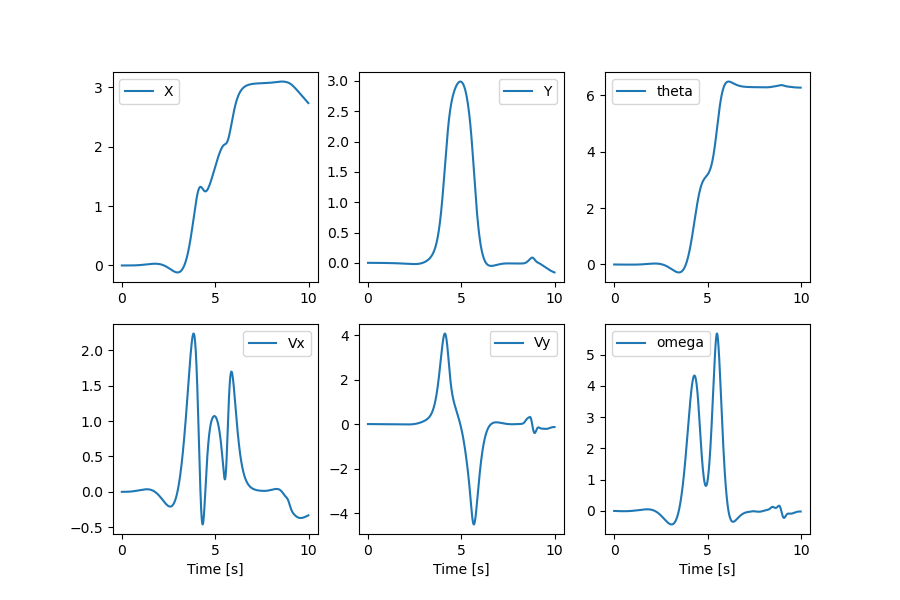

<IPython.core.display.Javascript object>


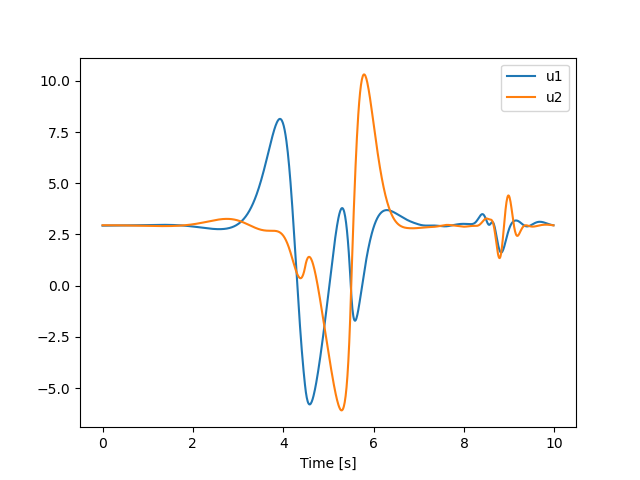

Text(0.5, 0, 'Time [s]')

In [ ]:
#Part 4.2 (iLQR full flip)
#Making drone flip fully
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import quadrotor
horizon_length = 1000
import flip
part4Solver = flip.quadSys()
z0 = np.array([0., 0., 0., 0., 0., 0.])
part4Solver.ilrq()
t, state, u = quadrotor.simulate(z0, part4Solver.full_flip_controller, 1000 - 1, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')